In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import pickle as pkl
import streamlit as st
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer


In [3]:
# Loading the dataset
data = pd.read_csv('C:\\Users\\SHEQEY\\Desktop\\heartfailureprediction\\heart_failure_prediction.csv')

In [4]:
#view the first 10 rows of the dataset
data.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [5]:
#view the last 10 rows of the dataset
data.tail(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1180,63,1,4,140,187,0,2,144,1,4.0,1,1
1181,63,0,4,124,197,0,0,136,1,0.0,2,1
1182,41,1,2,120,157,0,0,182,0,0.0,1,0
1183,59,1,4,164,176,1,2,90,0,1.0,2,1
1184,57,0,4,140,241,0,0,123,1,0.2,2,1
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [6]:
# checking column names
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [7]:
# checking the shape of the dataset
rows, columns = data.shape
print(f"This dataset has {rows} rows and {columns} columns")

This dataset has 1190 rows and 12 columns


In [8]:
#checking for data types
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [9]:
# checking for null values
data.isnull().sum().sum()

0

In [10]:
# checking duplicates
data.duplicated().any()

True

In [11]:
# removing of duplicates
data.drop_duplicates(inplace=True)

In [12]:
# checking duplicates
data.duplicated().any()

False

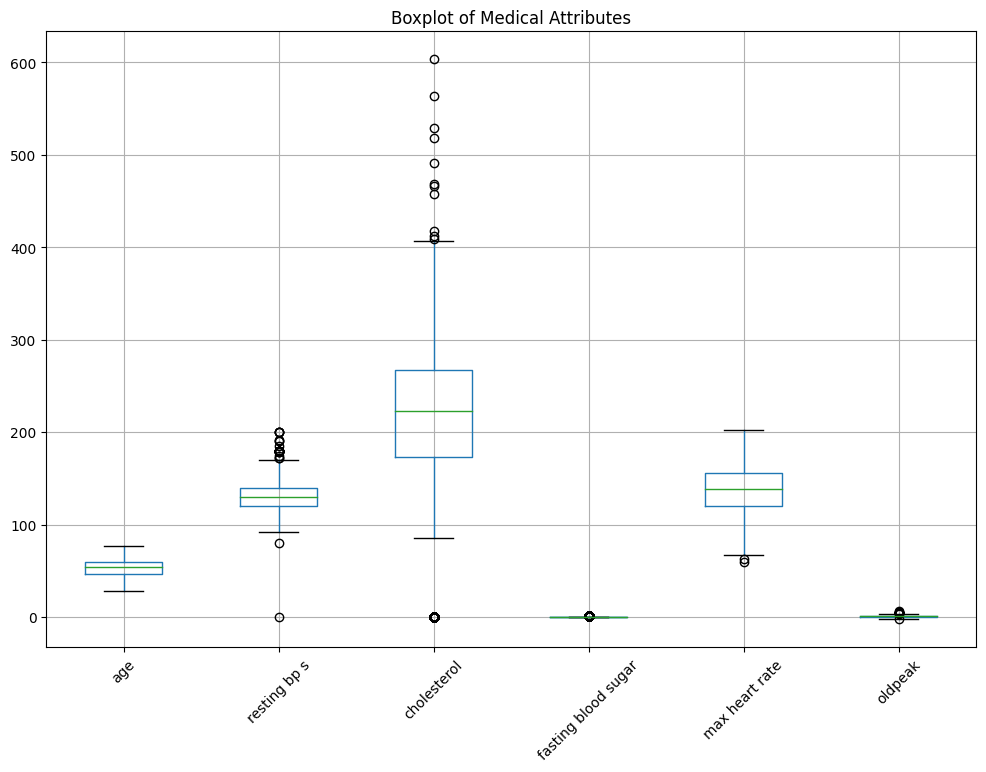

In [13]:
#Outliers

# Define columns to plot
columns_to_plot = ['age', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'max heart rate', 'oldpeak']

# Create a boxplot for each column
plt.figure(figsize=(12, 8))
data[columns_to_plot].boxplot()
plt.title('Boxplot of Medical Attributes')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Describing the columns and rows of the data into columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
chest pain type,918.0,3.251634,0.931031,1.0,3.00,4.0,4.0,4.0
resting bp s,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fasting blood sugar,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
resting ecg,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
max heart rate,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exercise angina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


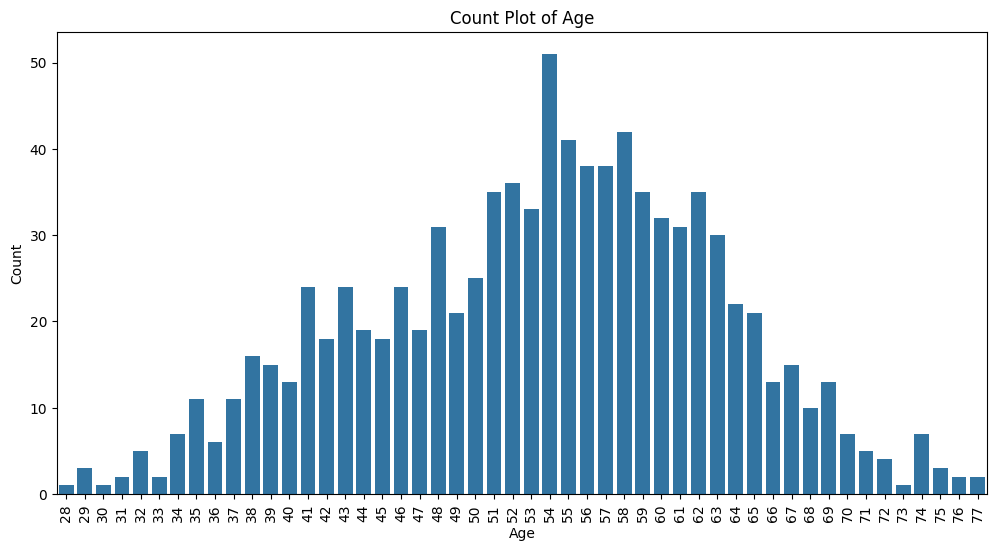

In [15]:
# plotting age against count

# Count plot for age variable
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=data)
plt.title('Count Plot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()


C:\Users\SHEQEY\AppData\Local\Temp\ipykernel_19216\645726424.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=data, palette='Set1')


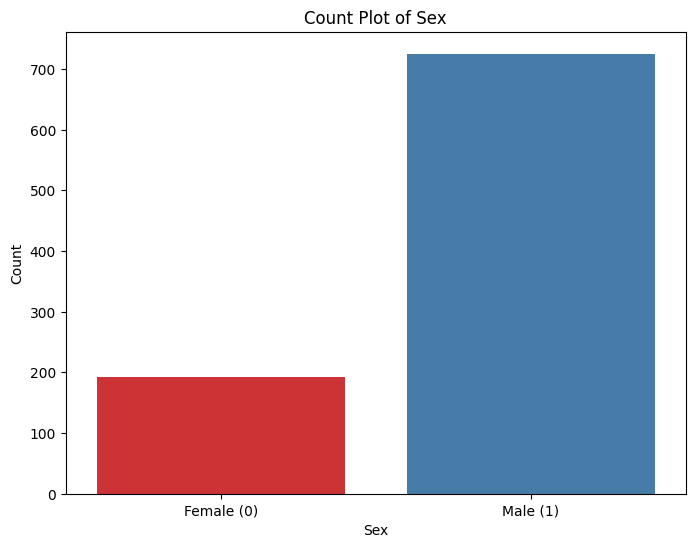

In [16]:
# plotting sex against count
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Count plot for sex variable with different colors
sns.countplot(x='sex', data=data, palette='Set1')  

# Displaying both numerical values and descriptive labels on the x-axis
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'])

plt.title('Count Plot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

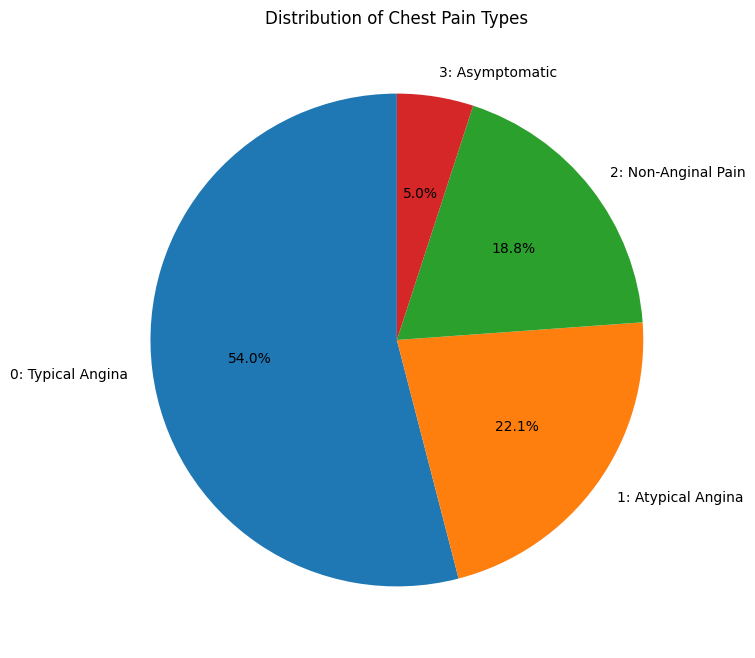

In [17]:
# Distribution of chest pain types using pie chart
# Define chest pain type labels and numerical values
chest_pain_labels = ['0: Typical Angina', '1: Atypical Angina', '2: Non-Anginal Pain', '3: Asymptomatic']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Pie chart for chest pain type variable
chest_pain_counts = data['chest pain type'].value_counts()

# Ensure the labels match the order of counts
ax.pie(chest_pain_counts, labels=chest_pain_labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Chest Pain Types')

plt.show()



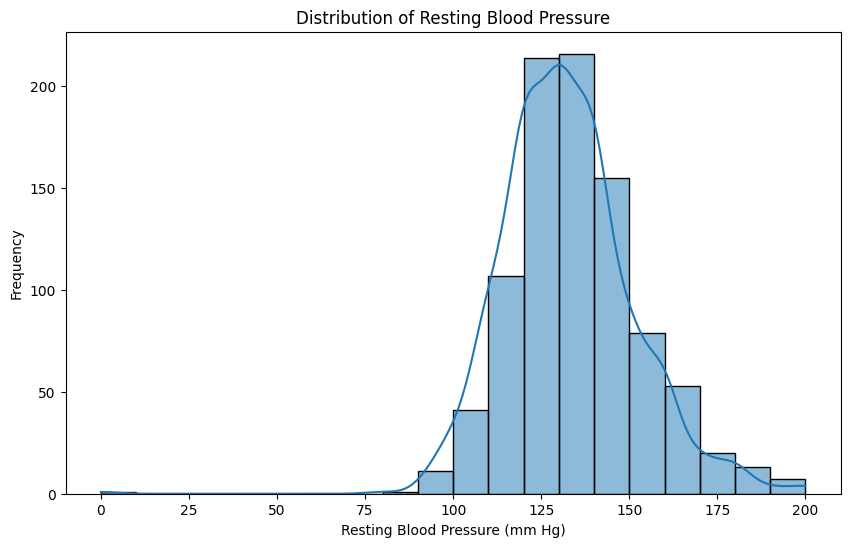

In [18]:
# distribution of resting blood pressure using histogram

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Histogram for resting blood pressure
sns.histplot(data['resting bp s'], bins=20, kde=True)
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')

plt.show()


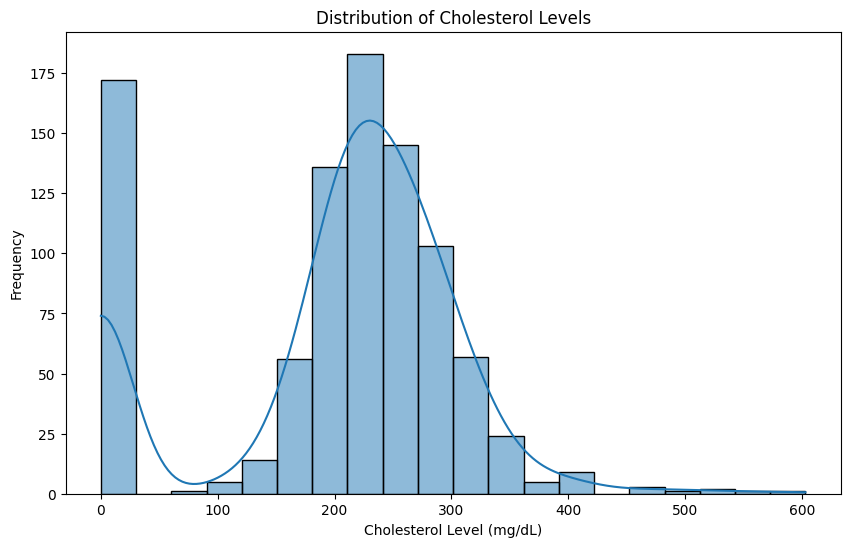

In [19]:
# distribution of cholesterol levels using histogram

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Histogram for cholesterol
sns.histplot(data['cholesterol'], bins=20, kde=True)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level (mg/dL)')
plt.ylabel('Frequency')

plt.show()


C:\Users\SHEQEY\AppData\Local\Temp\ipykernel_19216\2093792461.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fasting blood sugar', data=data, palette='Set2')


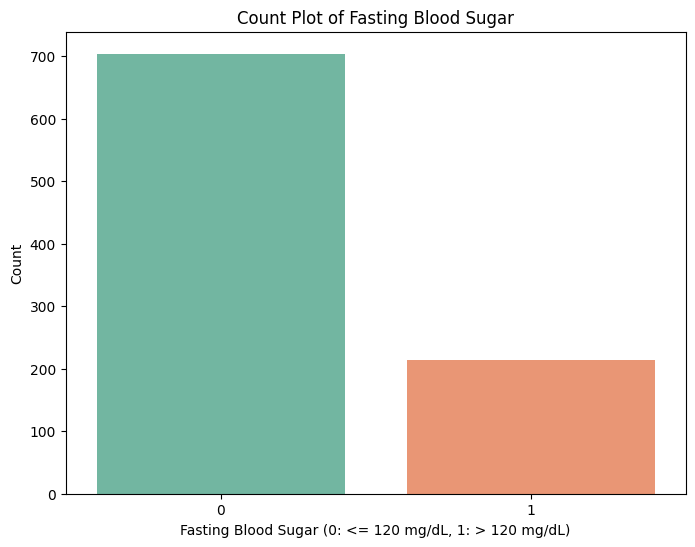

In [20]:
# count plot of fasting blood sugar

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Count plot for fasting blood sugar with different colors
sns.countplot(x='fasting blood sugar', data=data, palette='Set2')  
plt.title('Count Plot of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (0: <= 120 mg/dL, 1: > 120 mg/dL)')
plt.ylabel('Count')

plt.show()



C:\Users\SHEQEY\AppData\Local\Temp\ipykernel_19216\2160008033.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='resting ecg', data=data, palette='Set3')


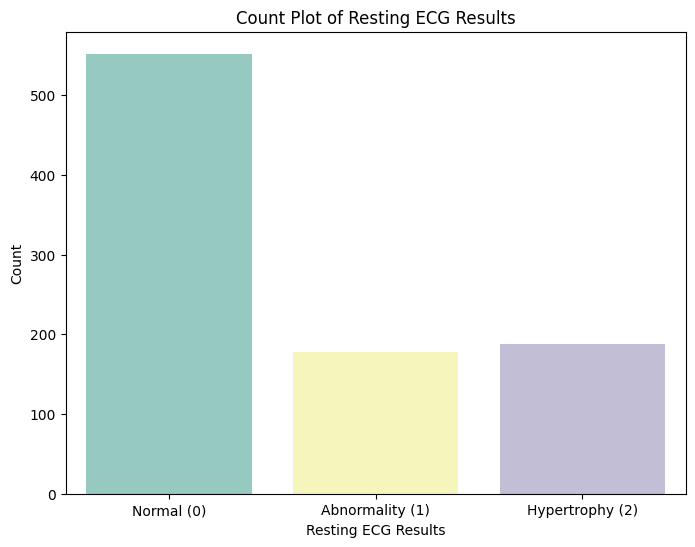

In [21]:
# count plot of resting ECG result

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Count plot for resting ECG results with different colors
sns.countplot(x='resting ecg', data=data, palette='Set3')  

# Displaying both numerical values and descriptive labels
plt.xticks(ticks=[0, 1, 2], labels=['Normal (0)', 'Abnormality (1)', 'Hypertrophy (2)'])

plt.title('Count Plot of Resting ECG Results')
plt.xlabel('Resting ECG Results')
plt.ylabel('Count')

plt.show()


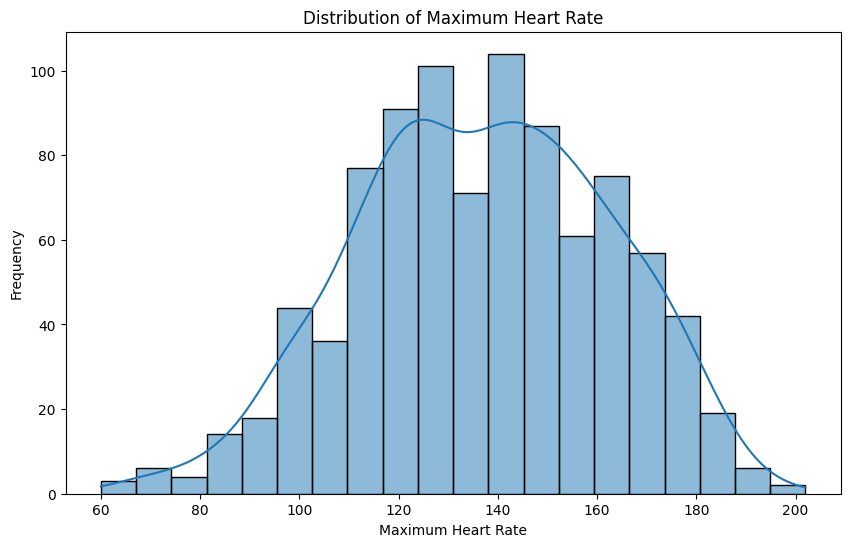

In [22]:
# distribution of maximum heart rate

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Histogram for maximum heart rate
sns.histplot(data['max heart rate'], bins=20, kde=True)
plt.title('Distribution of Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')

plt.show()



C:\Users\SHEQEY\AppData\Local\Temp\ipykernel_19216\4138826997.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='exercise angina', data=data, palette='Set2')


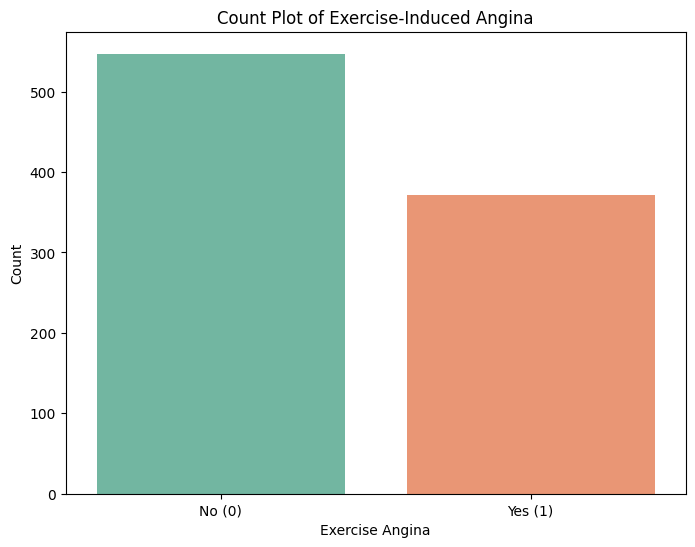

In [23]:
# count plot for exercise-inducted angina

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Count plot for exercise-induced angina with distinct colors
sns.countplot(x='exercise angina', data=data, palette='Set2')

# Displaying both numerical values and descriptive labels
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'])

plt.title('Count Plot of Exercise-Induced Angina')
plt.xlabel('Exercise Angina')
plt.ylabel('Count')

plt.show()



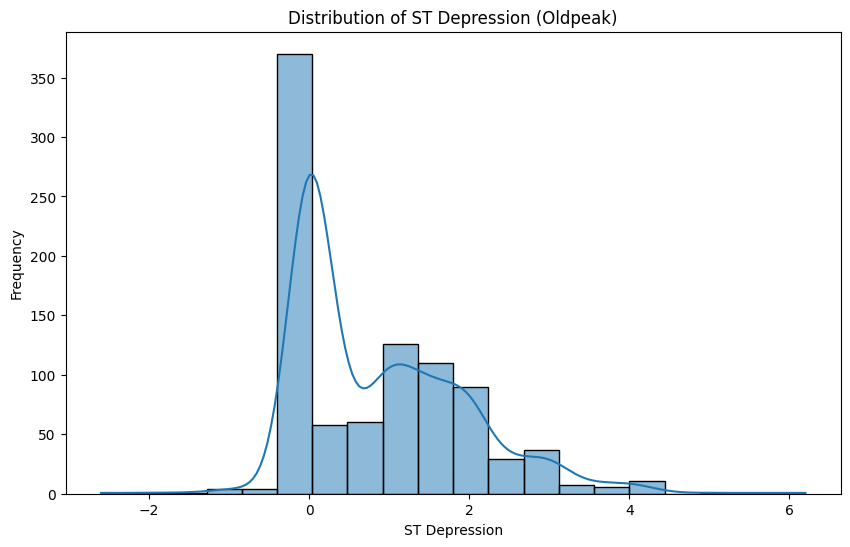

In [24]:
# distribution of ST depression(oldpeak)

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Histogram for oldpeak
sns.histplot(data['oldpeak'], bins=20, kde=True)
plt.title('Distribution of ST Depression (Oldpeak)')
plt.xlabel('ST Depression')
plt.ylabel('Frequency')

plt.show()


C:\Users\SHEQEY\AppData\Local\Temp\ipykernel_19216\4099601016.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ST slope', data=data, palette='husl', order=[0, 1, 2])


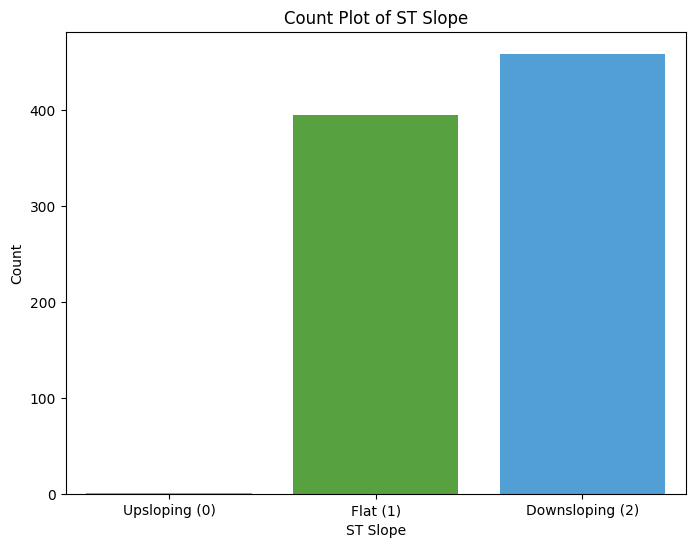

In [25]:
# count plot of ST slope
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Count plot for ST slope with different colors
sns.countplot(x='ST slope', data=data, palette='husl', order=[0, 1, 2])  

# Displaying both numerical values and descriptive labels
plt.xticks(ticks=[0, 1, 2], labels=['Upsloping (0)', 'Flat (1)', 'Downsloping (2)'])

plt.title('Count Plot of ST Slope')
plt.xlabel('ST Slope')
plt.ylabel('Count')

plt.show()


In [26]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Logistic regression for predicting heart disease presence

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8478260869565217

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


Confusion Matrix:
[[68  9]
 [19 88]]


In [29]:
# decision tree classifier for predicting heart disease presence

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8260869565217391

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        77
           1       0.89      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184


Confusion Matrix:
[[67 10]
 [22 85]]


In [30]:
# K-Nearest Neighbors (KNN) classifier for predicting heart disease presence

# Initialize the KNN classifier
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7065217391304348

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        77
           1       0.77      0.70      0.74       107

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184


Confusion Matrix:
[[55 22]
 [32 75]]


In [31]:
#Support Vector Machine (SVM) classifier for predicting heart disease presence

# Initialize the SVM classifier
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8478260869565217

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


Confusion Matrix:
[[68  9]
 [19 88]]


In [32]:
# Random Forest classifier for predicting heart disease presence

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8804347826086957

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


Confusion Matrix:
[[67 10]
 [12 95]]


In [33]:
import pickle
# saving the model
# Ensure the 'models' directory exists in the current working directory
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model and feature names
model_path = 'models/rfc_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump((model, X.columns), file)

print("Model saved successfully!")


Model saved successfully!


In [34]:
# Load the model and feature names
model_path = 'models/rfc_model.pkl'
with open(model_path, 'rb') as file:
    loaded_model, feature_names = pickle.load(file)

# Verify the loaded model and feature names
print("Model and feature names loaded successfully!")
print("Feature Names:", feature_names)

# Optionally, you can check the model type to ensure it's correct
print("Model Type:", type(loaded_model))

Model and feature names loaded successfully!
Feature Names: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')
Model Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
